### 📘 Project Title: Can a Machine Spot Fake News? 🤖📰



## 🧠 1. Hey there! What’s this project about?
In this notebook, I built a simple but surprisingly effective machine learning model to detect fake news — based only on text.

You'll see:

#### How I used NLP + Logistic Regression

#### How performance drops when we give it shorter or messier inputs 

#### Bonus: I turned it into a full working web app using Streamlit 💻

### 📂 2. Where did I get the data?
I used a labeled dataset with real and fake news articles from Kaggle — specifically:

#### Fake.csv – 23,000+ fake articles

#### True.csv – 21,000+ real articles

Each row has a title and text, so we can experiment with both!
### 🔢 3. Let’s import the stuff we need

In [1]:
# Basic data science tools
import pandas as pd
import numpy as np

# Machine learning: model + evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visuals
import matplotlib.pyplot as plt
import seaborn as sns


### 📊 4. Let’s load the data

In [10]:
# Load fake and real datasets
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Add labels: 0 = fake, 1 = real
fake_df["label"] = 0
real_df["label"] = 1

# Combine them into one big dataframe
df = pd.concat([fake_df, real_df], ignore_index=True)

# Shuffle the rows so real and fake articles are mixed
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()



,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


### 🧪 5. Let’s go further — add noise to simulate social media

In [11]:
import random
import re

def add_noise(text):
    # Randomly add emoji
    emojis = ['😂', '🔥', '🚨', '😱', '💯']
    if random.random() < 0.3:
        text += ' ' + random.choice(emojis)
    
    # Randomly uppercase some words
    words = text.split()
    for i in range(len(words)):
        if random.random() < 0.1:
            words[i] = words[i].upper()
    
    # Add random typos (e.g., double characters)
    noisy_text = []
    for word in words:
        if len(word) > 3 and random.random() < 0.2:
            idx = random.randint(1, len(word)-2)
            word = word[:idx] + word[idx]*2 + word[idx:]
        noisy_text.append(word)
    
    return ' '.join(noisy_text)


### 5. Let’s try the model on full article text first
##### TF-IDF helps us convert messy human language into something a model can work with. We use 80% of the data to train, 20% to test.

In [12]:
# Feature and label
X = df['title'].apply(add_noise)
y = df['label']
# you can also add just the "title " to see how the model is gonna perform 
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#### I went with Logistic Regression — it’s fast, works well with text, and very explainable. Perfect baseline.

In [13]:
# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

#### 📈 7. Let’s see how it did

Accuracy: 0.9359688195991092

Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      4710
           1       0.92      0.95      0.93      4270

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



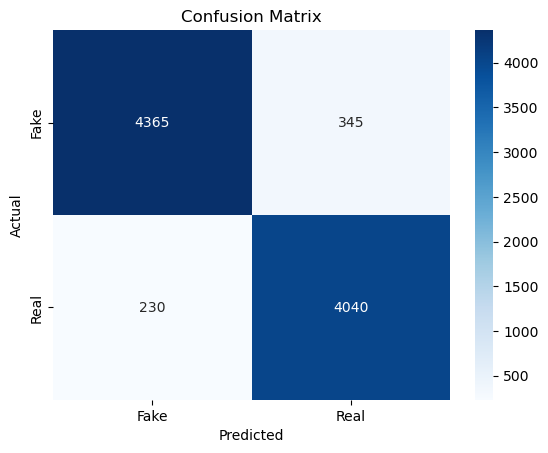

In [14]:
# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
# Try your own news!
sample = ["The government has approved a new policy to combat inflation."]
sample_vec = vectorizer.transform(sample)
print("Prediction:", "REAL" if model.predict(sample_vec)[0] else "FAKE")


Prediction: FAKE


In [15]:
import joblib

# Save your trained model and TF-IDF vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

### ✅  Bonus: I turned it into a web app!
You can now paste a headline into a Streamlit app and get a live prediction, complete with emojis and confidence score.
The app is lightweight, fast, and deployable on Streamlit Cloud !!! 